In [1]:
import geopandas as gpd
import pandas as pd

In [3]:
grid = gpd.read_file('jc_grid.geojson')

In [5]:
grid = grid[['TARGET_FID','Id','Shape_Leng','Shape_Area','GeoID','geometry']]

In [11]:
grid_scores = pd.read_csv('jc_grid_Scores_nov30.csv')

In [14]:
grid_scores.head()

,grid_id,imp_percent,imp_score,flood_score,green_score,greenview_index,storwater_managed,treecountestimate,overall_score
0,1,43.007936,4,0,NaN,NaN,0,0,1.333333
1,2,54.205350,3,1,NaN,NaN,0,0,1.333333
2,3,54.068938,3,1,NaN,NaN,0,0,1.333333
3,4,79.203148,2,1,0.0,17.946235,156800,196,1.000000
4,5,94.985259,0,1,NaN,NaN,0,0,0.333333


In [15]:
grid.head()

,TARGET_FID,Id,Shape_Leng,Shape_Area,GeoID,geometry
0,1,0,2530.758569,385934.045109,1.0,"POLYGON ((-74.05343 40.76242, -74.05548 40.762..."
1,2,0,2655.536428,444097.228757,2.0,"POLYGON ((-74.09057 40.73430, -74.09262 40.734..."
2,3,0,2721.468967,450465.444325,3.0,"POLYGON ((-74.10300 40.71478, -74.10505 40.714..."
3,4,0,2721.468310,450465.184524,4.0,"POLYGON ((-74.07227 40.70597, -74.07433 40.705..."
4,5,0,2721.468310,450465.184524,5.0,"POLYGON ((-74.06193 40.71898, -74.06398 40.718..."


In [16]:
grid = grid.merge(grid_scores,left_on='TARGET_FID', right_on='grid_id')

In [27]:
grid['imp_percent'] = grid['imp_percent'].fillna(0)

In [28]:
grid['green_score'] = grid['green_score'].fillna(0)

In [30]:
grid['greenview_index'] = grid['greenview_index'].fillna(0)

In [32]:
grid.to_file('grid_1204.geojson',driver='GeoJSON')

In [33]:
grid.head()

,TARGET_FID,Id,Shape_Leng,Shape_Area,GeoID,geometry,grid_id,imp_percent,imp_score,flood_score,green_score,greenview_index,storwater_managed,treecountestimate,overall_score
0,1,0,2530.758569,385934.045109,1.0,"POLYGON ((-74.05343 40.76242, -74.05548 40.762...",1,43.007936,4,0,0.0,0.000000,0,0,1.333333
1,2,0,2655.536428,444097.228757,2.0,"POLYGON ((-74.09057 40.73430, -74.09262 40.734...",2,54.205350,3,1,0.0,0.000000,0,0,1.333333
2,3,0,2721.468967,450465.444325,3.0,"POLYGON ((-74.10300 40.71478, -74.10505 40.714...",3,54.068938,3,1,0.0,0.000000,0,0,1.333333
3,4,0,2721.468310,450465.184524,4.0,"POLYGON ((-74.07227 40.70597, -74.07433 40.705...",4,79.203148,2,1,0.0,17.946235,156800,196,1.000000
4,5,0,2721.468310,450465.184524,5.0,"POLYGON ((-74.06193 40.71898, -74.06398 40.718...",5,94.985259,0,1,0.0,0.000000,0,0,0.333333


In [35]:
grid.overall_score.max()

4.333333333

In [36]:
grid.overall_score.min()

0.0

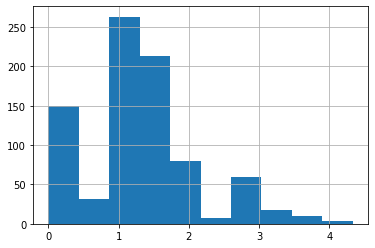

In [38]:
grid.overall_score.hist()

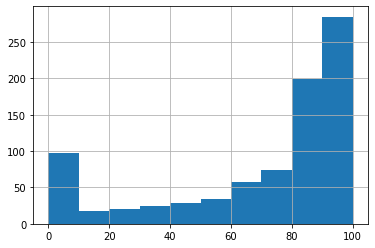

In [42]:
grid.imp_percent.hist()